# Prediction of term deposit subscription

## 1. Business Problem Understanding

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

## 2. Data Understanding

**[FILE USED]**
<BR>
bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

**[VARIABLE DESCRIPTION]**
<br>
1 - age : client's age(numeric)
<br>
2 - job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
<br>
3 - marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
<br>
4 - education : (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
<br>
5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown')
<br>
6 - housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
<br>
7 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
<br>
8 - contact: contact communication type (categorical: 'cellular', 'telephone')
<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
<br>
10 - day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
<br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)
<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
<br>
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
<br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)
<br>
<br>
**[TARGET DESCRIPTION]**
<br>
1 - y - has the client subscribed a term deposit? (binary: 'yes','no')

**[FEATURE]**
<br>
Categorical: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome
<br>
Numeric: age, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed (duration excluded due to its highly affect to target)

**[TARGET]**
<br>
y (0 or 1)

## 3. Data Preparation

### 3.1 Import the libraries and read the data needed

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Read the all the files needed and assign them into variables. We use bank-additional-full and bank-additional because variable in bank-full and bank didn't explained 

In [81]:
baf = pd.read_csv('bank-additional-full.csv')

We need to change the target to 0 or 1 so the algorithm can understand the data

In [82]:
baf['y'] = baf['y'].apply(lambda x: 1 if x == 'yes' else 0)

### 3.2 Explore the basic statistics of the data

In [83]:
baf.head().transpose()

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


Find out about the data type

In [84]:
baf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [85]:
baf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


From the basic statiscs and information about the dataset, there are 2 types of feature: numeric and categorical. And there is some data that highly skewed like **'pdays'**. In this case I will **exclude duration** to make a realistic model (look at the **Data Understanding** part). Now I will explore all the data first

### 3.3 Exploratory Data Analysis

What I want to see first is if the group of term-subscriber and not subscriber is balance or not

Text(0.5, 1.0, 'Distribution of y')

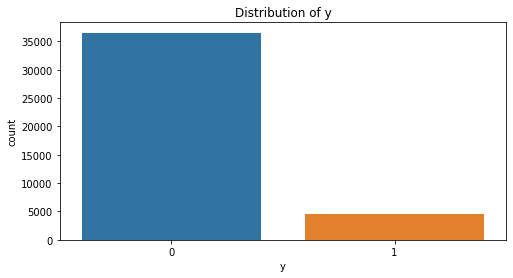

In [86]:
plt.figure(figsize=(8,4))
sns.countplot(x='y',data = baf)
plt.xlabel('y')
plt.title('Distribution of y')

It seems the distribution heavily concentrated on **not subscriber**

#### 3.3.1 Numerical Feature

**[Pdays]**
<br>
In statistics basic info, there is something strange with the **'pdays'** feature. The 25%, 50%,  75% quartile shows exact same value 999 (could be seen in distribution above) which means almost all proportion is 999. It seems **whether a customer subscribe a term-deposit or not is less likely affected by the days passed by after the client was last contacted from a previous campaign**

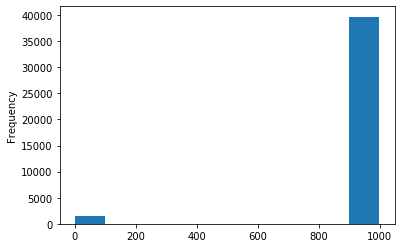

In [87]:
baf['pdays'].plot.hist()

Because mostly the data value is 999, I think there is not much difference between 1 day of ago, or 2 days, or 3 days, or etc. So I will divide them into 2 new groups, the ones that have called by bank, and the ones that haven,t.

In [88]:
baf['pdays'] = baf['pdays'].apply(lambda x: 'Not Called' if x == 999 else 'Called')

**[Age]**
<br>
The average customer's age is around 35-40 and it make sense because bank will more likely contact people who mature enough to think about future investment, plus it is a low-risk investment and mature people more prefer this kind of investment rather than young people.

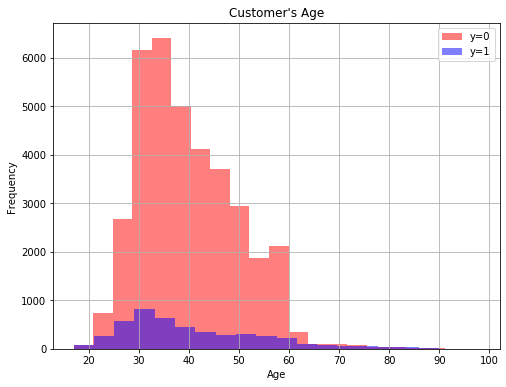

In [89]:
plt.figure(figsize=(8,6))
baf[baf['y']==0]['age'].hist(alpha=0.5,color='red',bins=20,label='y=0')
baf[baf['y']==1]['age'].hist(alpha=0.5,color='blue',bins=20,label='y=1')
plt.title("Customer's Age")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

If we see the age separated based on whether the customer subscribing or no, the distributions are so overlapping! Even their mean value difference merely less than 10! I think this shows that**age doesn't separate the group well enough**.

**[Campaign]**
<br>
Number of contacts performed during this campaign and for this client mostly less than 5 and it makes sense because we shouldn't contact same people for campaigning our progroam for many times. The outliers shows it even reaches 50

Text(0, 0.5, 'Frequency')

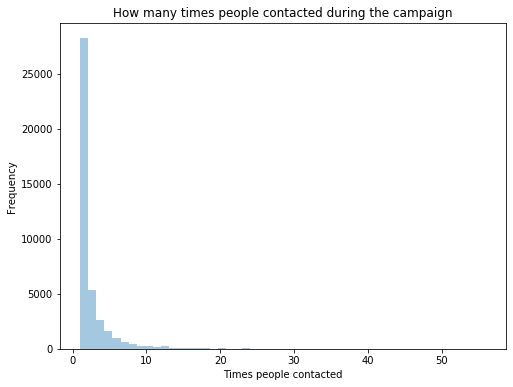

In [90]:
plt.figure(figsize=(8,6))
sns.distplot(baf['campaign'],kde=False)
plt.title('How many times people contacted during the campaign')
plt.xlabel('Times people contacted')
plt.ylabel('Frequency')

Because It is highly concentrated at less than 3, I decided to grouping them. I will see very value counts to make an effective binning distribution

In [91]:
baf['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

Because most of them called up to twice, I will separate them into 2 group, up to twice called and more than twice called

In [92]:
baf['campaign'] = baf['campaign'].apply(lambda x: 'less_than_twice' if x <= 2 else 'more_than_twice')

**[Previous]**
<br>
Most of the client didn't contacted before this campaign, so I will look whether number of contact performed in previous campaign affect the customer to subsribe the term-deposit or not by seeing distribution of people who subscribed and have contacted before

Text(0, 0.5, 'Frequency')

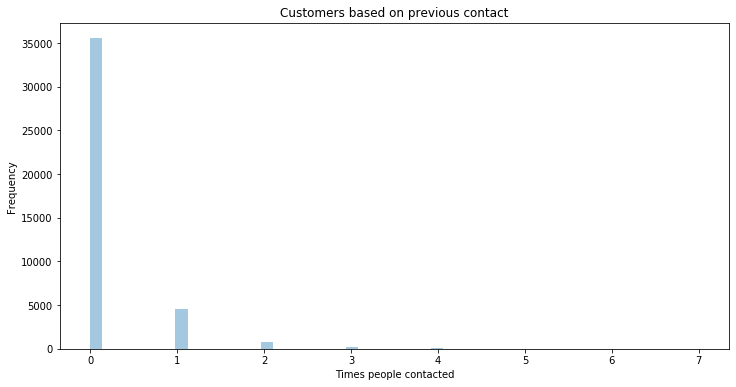

In [93]:
plt.figure(figsize=(12,6))
sns.distplot(baf['previous'],kde=False)
plt.title('Customers based on previous contact')
plt.xlabel('Times people contacted')
plt.ylabel('Frequency')

I will divide them into 2 groups, the one haven't contacted in the previous campaign, and the ones who contacted.

In [94]:
baf['previous'] = baf['previous'].apply(lambda x: 'Not contacted in prev camp' if x == 0 else 'Contacted in prev camp')

**[Consumer Confidence Index]**
<br>
Consumer Confidence Index is an economic indicator that publiced once a month to measure consumer confidence.Because it is a monthly indicator, the number "spiking" in some values.

Text(0, 0.5, 'Frequency')

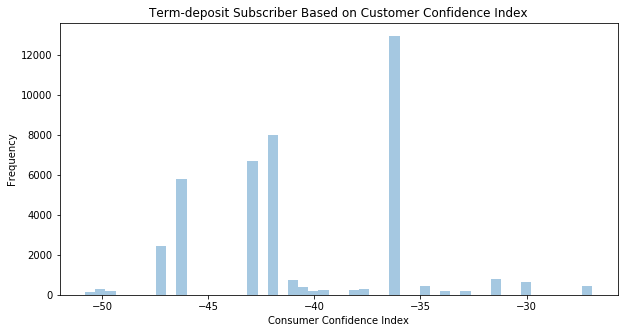

In [95]:
plt.figure(figsize=(10,5))
sns.distplot(baf['cons.conf.idx'],kde=False)
plt.title('Term-deposit Subscriber Based on Customer Confidence Index')
plt.xlabel('Consumer Confidence Index')
plt.ylabel('Frequency')

**[Euribor3m]**
<br>
Euribor3m is Euro Interbank Offered Rate published by the European Money Markets Institute, based on the averaged interest rates at which Eurozone banks offer to lend unsecured funds to other banks in the euro wholesale money market (or interbank market). Same like consumer confidence index, data shows it spiking in some particular range.

Text(0, 0.5, 'Frequency')

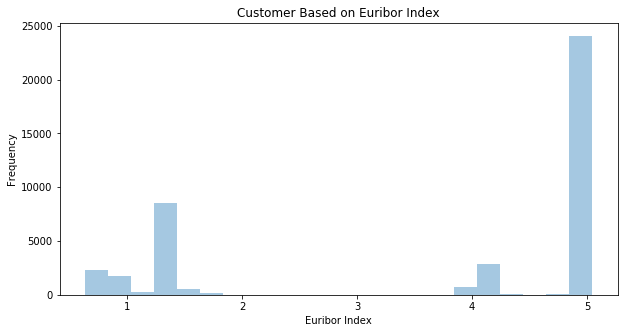

In [96]:
plt.figure(figsize=(10,5))
sns.distplot(baf['euribor3m'],kde=False)
plt.title('Customer Based on Euribor Index')
plt.xlabel('Euribor Index')
plt.ylabel('Frequency')

**[nr.employeed]**
<br>
This indicator shows the number of employee of the bank when the customer campaigned by the bank

Text(0, 0.5, 'Frequency')

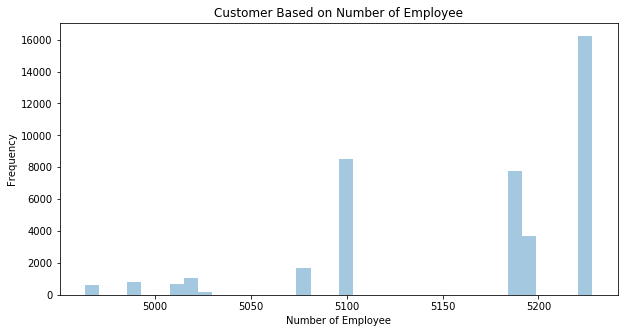

In [97]:
plt.figure(figsize=(10,5))
sns.distplot(baf['nr.employed'],kde=False)
plt.title('Customer Based on Number of Employee')
plt.xlabel('Number of Employee')
plt.ylabel('Frequency')

**[cons.price.idx]**
<br>
This index shows measures changes in the price level of a weighted average market basket of consumer goods and services purchased by households.

Text(0, 0.5, 'Frequency')

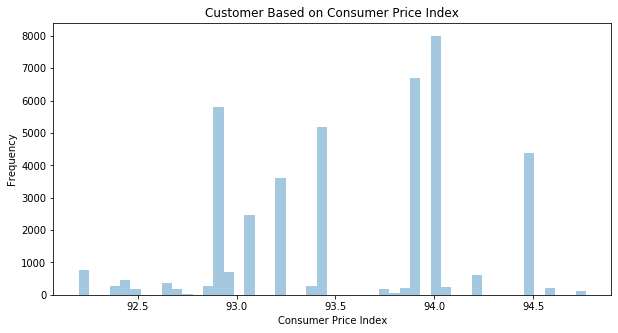

In [98]:
plt.figure(figsize=(10,5))
sns.distplot(baf['cons.price.idx'],kde=False)
plt.title('Customer Based on Consumer Price Index')
plt.xlabel('Consumer Price Index')
plt.ylabel('Frequency')

#### 3.3.2 Categorical Feature

For categorical features, I will explore the distribution of term-deposit subscriber and non subscriber in every categorical feature. I will also calculate the **rate** which define **proportional of term deposit subscriber of customer in every category.**
<br>
<br>
Later, I will deal with this categorical feature using Weight of Evidence (WoE) and Information Value (IV) to change each predictivity of each feature and change the categorical to numerical with some condition.

**[Job]**

The average for term-deposit subscriber per category in job is ranged between 0.05-0.15. But we can see there is such an anomaly for 2 specific jobs, they are retired and student! It shows that it could be a good predictor seems people whose are retired or students will be more likely to subscribe term-deposit
<br>
<br>
Anyway, if you think the student rate raise because the sample amount is too small, you are maybe right but I won't exclude it because when I look at the other categories who have similiar sample amount (entrepreneur, self-employed, housemaid, unemployed) they don't show this significant rate like Student.

Text(0.5, 1.0, 'Job')

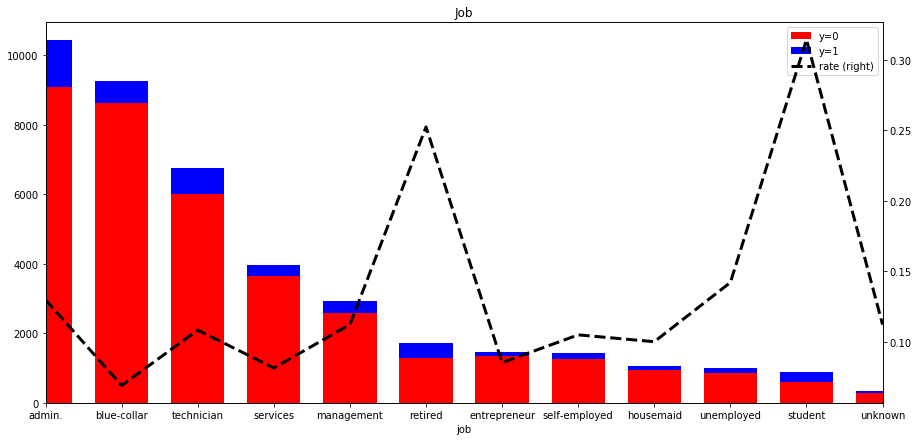

In [99]:
#Creating dataframe with index=categorical values, and columns=count of y for every y value
df1 = pd.DataFrame(baf[baf['y']==0][['job','y']].groupby('job').count())
df2 = pd.DataFrame(baf[baf['y']==1][['job','y']].groupby('job').count())
df3 = pd.DataFrame(baf[['job','y']].groupby('job').count())

# Merge the 3 dataframes 
df = pd.merge(df1,df2, how='outer', on='job')
df = pd.merge(df,df3, how='outer', on='job')
df.columns=['y=0','y=1','Total']
df['rate'] = df['y=1']/df['Total']
df = df.sort_values('Total',ascending=False)
df.fillna(0,inplace=True)

#Plotting the data 
df[['y=0','y=1']].plot.bar(stacked=True,color=['red','blue'],figsize=(15,7),width=0.7,legend=9)
df['rate'].plot(secondary_y=True,color='black',legend=True,linewidth=3,linestyle='--')
plt.title('Job')

**[Marital]**
<br>
Seems that for **unknown** category have too small amount of sample and this will be a pitfall when we use WoE (Weight of Evidence) for this categorical feature so it could give  us wrong value of IV for **marital** feature, so I will remove it

Text(0.5, 1.0, 'Marital')

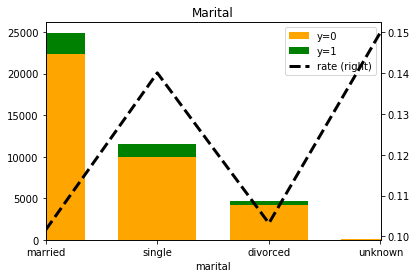

In [100]:
#Creating dataframe with index=categorical values, and columns=count of y for every y value
df1 = pd.DataFrame(baf[baf['y']==0][['marital','y']].groupby('marital').count())
df2 = pd.DataFrame(baf[baf['y']==1][['marital','y']].groupby('marital').count())
df3 = pd.DataFrame(baf[['marital','y']].groupby('marital').count())

# Merge the 3 dataframes 
df = pd.merge(df1,df2, how='outer', on='marital')
df = pd.merge(df,df3, how='outer', on='marital')
df.columns=['y=0','y=1','Total']
df.fillna(0,inplace=True)

#Creating column of subscriber percetage per group
df['rate'] = df['y=1']/df['Total']
df = df.sort_values('Total',ascending=False)

#Plotting the data 
df[['y=0','y=1']].plot.bar(stacked=True,color=['orange','green'],figsize=(6,4),width=0.7)
df['rate'].plot(secondary_y=True,color='black',legend=True,linewidth=3,linestyle='--')
plt.title('Marital')

**[Education]**
<br>
The graph shows significant high rate for **illiterate** . It is caused by term-deposit subscriber people whose education is included in illiterate only 4 people but it is 4 out of 18, makes it high proportional. And from business logic, it doesn't make sense when illiterate people have much higher proportion of term-deposit subscriber than the ones who are educated. Also, WoE and IV method cant accept the bin of feature with too small amount of observation. So I will exclude **'illiterate'** from **education**.

Text(0.5, 1.0, 'Education')

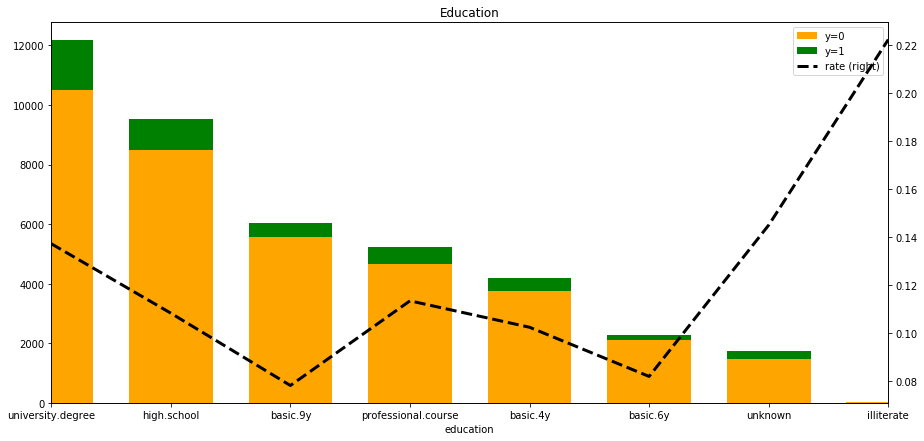

In [101]:
#Creating dataframe with index=categorical values, and columns=count of y for every y value
df1 = pd.DataFrame(baf[baf['y']==0][['education','y']].groupby('education').count())
df2 = pd.DataFrame(baf[baf['y']==1][['education','y']].groupby('education').count())
df3 = pd.DataFrame(baf[['education','y']].groupby('education').count())

# Merge the 3 dataframes 
df = pd.merge(df1,df2, how='outer', on='education')
df = pd.merge(df,df3, how='outer', on='education')
df.columns=['y=0','y=1','Total']
df.fillna(0,inplace=True)

#Creating column of subscriber percetage per group
df['rate'] = df['y=1']/df['Total']
df = df.sort_values('Total',ascending=False)

#Plotting the data 
df[['y=0','y=1']].plot.bar(stacked=True,color=['orange','green'],figsize=(15,7),width=0.7)
df['rate'].plot(secondary_y=True,color='black',legend=True,linewidth=3,linestyle='--')
plt.title('Education')

**[Default]**
<br>
The other rule of WoE binning is **every binning have to has event observation and non-event observation**. Since no term deposit subscriber has default, it means the 'yes' category doesn't have event observation

Text(0.5, 1.0, 'Default')

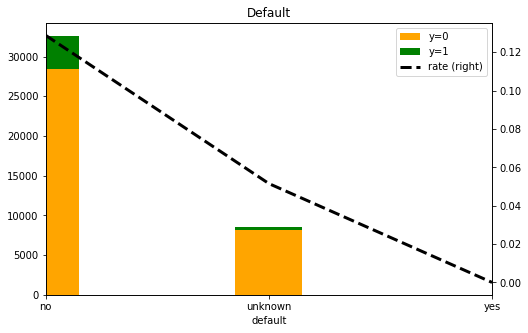

In [102]:
#Creating dataframe with index=categorical values, and columns=count of y for every y value
df1 = pd.DataFrame(baf[baf['y']==0][['default','y']].groupby('default').count())
df2 = pd.DataFrame(baf[baf['y']==1][['default','y']].groupby('default').count())
df3 = pd.DataFrame(baf[['default','y']].groupby('default').count())

# Merge the 3 dataframes 
df = pd.merge(df1,df2, how='outer', on='default')
df = pd.merge(df,df3, how='outer', on='default')
df.columns=['y=0','y=1','Total']
df.fillna(0,inplace=True)

#Creating column of subscriber percetage per group
df['rate'] = df['y=1']/df['Total']
df = df.sort_values('Total',ascending=False)

#Plotting the data 
df[['y=0','y=1']].plot.bar(stacked=True,color=['orange','green'],figsize=(8,5),width=0.3)
df['rate'].plot(secondary_y=True,color='black',legend=True,linewidth=3,linestyle='--')
plt.title('Default')

**[Housing]**
<br>
No significant range change between each category, and this means it wont lead to any wrong information value. Also the distribution still make sense using the business logic.

Text(0.5, 1.0, 'Housing')

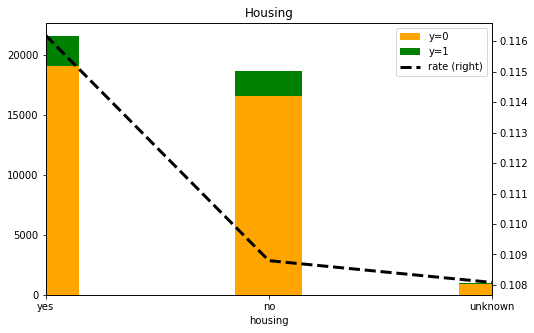

In [103]:
#Creating dataframe with index=categorical values, and columns=count of y for every y value
df1 = pd.DataFrame(baf[baf['y']==0][['housing','y']].groupby('housing').count())
df2 = pd.DataFrame(baf[baf['y']==1][['housing','y']].groupby('housing').count())
df3 = pd.DataFrame(baf[['housing','y']].groupby('housing').count())

# Merge the 3 dataframes 
df = pd.merge(df1,df2, how='outer', on='housing')
df = pd.merge(df,df3, how='outer', on='housing')
df.columns=['y=0','y=1','Total']
df.fillna(0,inplace=True)

#Creating column of subscriber percetage per group
df['rate'] = df['y=1']/df['Total']
df = df.sort_values('Total',ascending=False)

#Plotting the data 
df[['y=0','y=1']].plot.bar(stacked=True,color=['orange','green'],figsize=(8,5),width=0.3)
df['rate'].plot(secondary_y=True,color='black',legend=True,linewidth=3,linestyle='--')
plt.title('Housing')

**[Loan]**
<br>
Same like housing, there is no significant change that will lead to any wrong IV. The distribution still make sense using the business logic (the ones who having loan wouldn't prefer to subsribe term deposit and pay-off their loan first\

Text(0.5, 1.0, 'Loan')

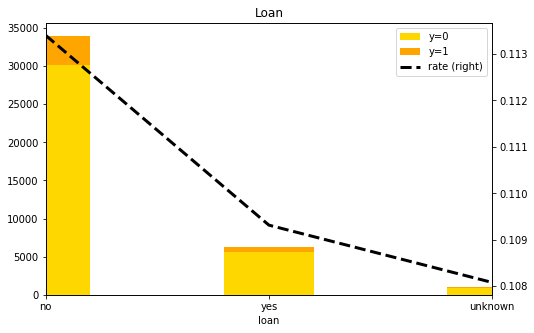

In [104]:
#Creating dataframe with index=categorical values, and columns=count of y for every y value
df1 = pd.DataFrame(baf[baf['y']==0][['loan','y']].groupby('loan').count())
df2 = pd.DataFrame(baf[baf['y']==1][['loan','y']].groupby('loan').count())
df3 = pd.DataFrame(baf[['loan','y']].groupby('loan').count())

# Merge the 3 dataframes 
df = pd.merge(df1,df2, how='outer', on='loan')
df = pd.merge(df,df3, how='outer', on='loan')
df.columns=['y=0','y=1','Total']
df.fillna(0,inplace=True)

#Creating column of subscriber percetage per group
df['rate'] = df['y=1']/df['Total']
df = df.sort_values('Total',ascending=False)

#Plotting the data 
df[['y=0','y=1']].plot.bar(stacked=True,color=['gold','orange'],figsize=(8,5),width=0.4)
df['rate'].plot(secondary_y=True,color='black',legend=True,linewidth=3,linestyle='--')
plt.title('Loan')

**[Contact]**
<br>
Term-deposit subscriber concentrated on people who contacted by cell-phone, there is pretty significant difference rate between customer called by cellphone and called by telephone

Text(0.5, 1.0, 'Contact')

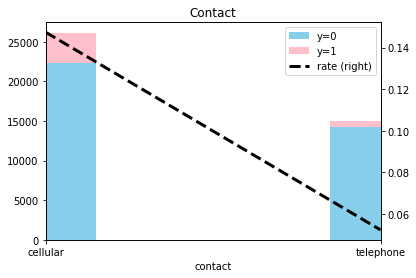

In [105]:
#Creating dataframe with index=categorical values, and columns=count of y for every y value
df1 = pd.DataFrame(baf[baf['y']==0][['contact','y']].groupby('contact').count())
df2 = pd.DataFrame(baf[baf['y']==1][['contact','y']].groupby('contact').count())
df3 = pd.DataFrame(baf[['contact','y']].groupby('contact').count())

# Merge the 3 dataframes 
df = pd.merge(df1,df2, how='outer', on='contact')
df = pd.merge(df,df3, how='outer', on='contact')
df.columns=['y=0','y=1','Total']
df.fillna(0,inplace=True)

#Creating column of subscriber percetage per group
df['rate'] = df['y=1']/df['Total']
df = df.sort_values('Total',ascending=False)

#Plotting the data 
df[['y=0','y=1']].plot.bar(stacked=True,color=['skyblue','pink'],figsize=(6,4),width=0.3)
df['rate'].plot(secondary_y=True,color='black',legend=True,linewidth=3,linestyle='--')
plt.title('Contact')

**[Month]**
<br>
The distribution of term deposit subscriber based customer's month when contacted  is well-distributed and not concentrated on a particular month. Some months shows it has higher rates like the ones in december, october, september, and march

Text(0.5, 1.0, 'Month')

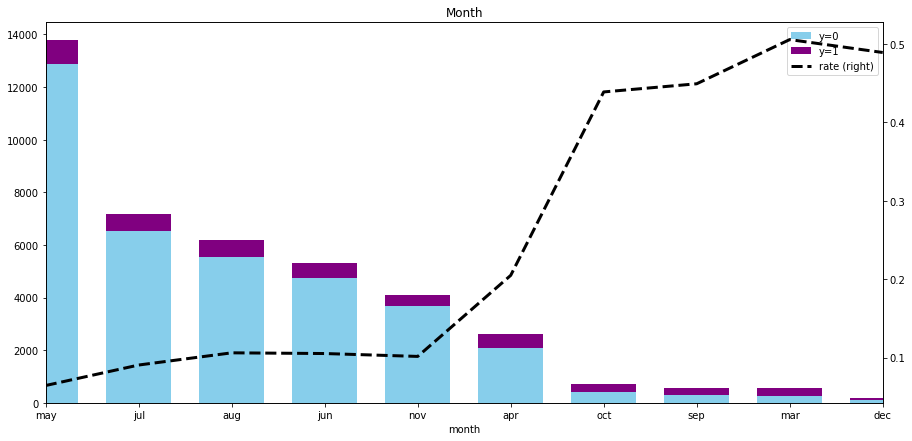

In [106]:
#Creating dataframe with index=categorical values, and columns=count of y for every y value
df1 = pd.DataFrame(baf[baf['y']==0][['month','y']].groupby('month').count())
df2 = pd.DataFrame(baf[baf['y']==1][['month','y']].groupby('month').count())
df3 = pd.DataFrame(baf[['month','y']].groupby('month').count())

# Merge the 3 dataframes 
df = pd.merge(df1,df2, how='outer', on='month')
df = pd.merge(df,df3, how='outer', on='month')
df.columns=['y=0','y=1','Total']
df.fillna(0,inplace=True)

#Creating column of subscriber percetage per group
df['rate'] = df['y=1']/df['Total']
df = df.sort_values('Total',ascending=False)

#Plotting the data 
df[['y=0','y=1']].plot.bar(stacked=True,color=['skyblue','purple'],figsize=(15,7),width=0.7)
df['rate'].plot(secondary_y=True,color='black',legend=True,linewidth=3,linestyle='--')
plt.title('Month')

**[Day of Week]**
<br>
The distribution of term deposit subscriber based customer's day of week contacted is well-distributed. Just shows significant drop rates in the monday

Text(0.5, 1.0, 'Day of Week')

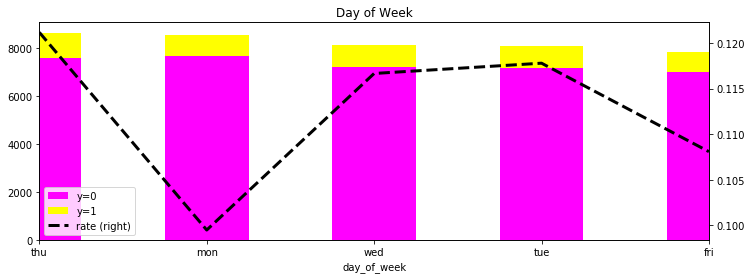

In [107]:
#Creating dataframe with index=categorical values, and columns=count of y for every y value
df1 = pd.DataFrame(baf[baf['y']==0][['day_of_week','y']].groupby('day_of_week').count())
df2 = pd.DataFrame(baf[baf['y']==1][['day_of_week','y']].groupby('day_of_week').count())
df3 = pd.DataFrame(baf[['day_of_week','y']].groupby('day_of_week').count())

# Merge the 3 dataframes 
df = pd.merge(df1,df2, how='outer', on='day_of_week')
df = pd.merge(df,df3, how='outer', on='day_of_week')
df.columns=['y=0','y=1','Total']
df.fillna(0,inplace=True)

#Creating column of subscriber percetage per group
df['rate'] = df['y=1']/df['Total']
df = df.sort_values('Total',ascending=False)

#Plotting the data 
df[['y=0','y=1']].plot.bar(stacked=True,color=['magenta','yellow'],figsize=(12,4),width=0.5)
df['rate'].plot(secondary_y=True,color='black',legend=True,linewidth=3,linestyle='--')
plt.title('Day of Week')

**[Poutcome]**
<br>
Outcome of the previous marketing campaign related well enough with subscriber term-deposit. Looks like that most of success campaigned customer in previous campaigned will be a term-deposit subscriber in this period of campaign 

Text(0.5, 1.0, 'Poutcome')

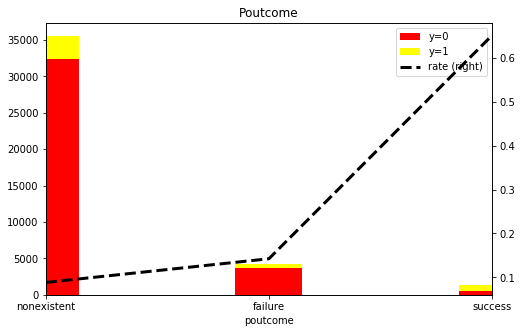

In [108]:
#Creating dataframe with index=categorical values, and columns=count of y for every y value
df1 = pd.DataFrame(baf[baf['y']==0][['poutcome','y']].groupby('poutcome').count())
df2 = pd.DataFrame(baf[baf['y']==1][['poutcome','y']].groupby('poutcome').count())
df3 = pd.DataFrame(baf[['poutcome','y']].groupby('poutcome').count())

# Merge the 3 dataframes 
df = pd.merge(df1,df2, how='outer', on='poutcome')
df = pd.merge(df,df3, how='outer', on='poutcome')
df.columns=['y=0','y=1','Total']
df.fillna(0,inplace=True)

#Creating column of subscriber percetage per group
df['rate'] = df['y=1']/df['Total']
df = df.sort_values('Total',ascending=False)

#Plotting the data 
df[['y=0','y=1']].plot.bar(stacked=True,color=['red','yellow'],figsize=(8,5),width=0.3)
df['rate'].plot(secondary_y=True,color='black',legend=True,linewidth=3,linestyle='--')
plt.title('Poutcome')

### 3.4 Feature Engineering

In this section, I will do some feature engineering. I will reduce some feature using **Weight of Evidence** and **Information Value** method. The method tells the predictive power of an independent variable in relation to the dependent variable. This method will give the predictive power (information value) for each category. It also handle my categorical feature by change it into numbers so the algorithm could understand the input. Before entering WoE and IV, I will prepare the data first. One of the rule of WoE is the bin/value of feature can't have too small amount of observation. So I will remove them and treat them as noise

In [109]:
baf = baf[baf['default'] != 'yes']
baf = baf[baf['marital'] != 'unknown']
baf = baf[baf['education'] != 'illiterate']

After I remove the noise, I will continue to the WOE and IV to calculate the Information Value of every feature. This algorithm to binning and calculate WoE I got from https://github.com/Sundar0989/WOE-and-IV/blob/master/WOE_IV.ipynb

In [110]:
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

Now I will calculate the WOE and IV for every category in my bank client data

In [111]:
final_iv_baf, IV_baf = data_vars(baf,baf['y'])

In [112]:
pd.options.display.max_rows = 1000
final_iv_baf

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,age,17,38,21123,2515,0.119065,18608,0.880935,0.543901,0.510326,0.063719,0.004524
1,age,39,98,19964,2109,0.105640,17855,0.894360,0.456099,0.489674,-0.071032,0.004524
2,job,admin.,admin.,10407,1350,0.129720,9057,0.870280,0.291955,0.248389,0.161605,0.189258
3,job,blue-collar,blue-collar,9232,635,0.068782,8597,0.931218,0.137327,0.235773,-0.540506,0.189258
4,job,entrepreneur,entrepreneur,1451,122,0.084080,1329,0.915920,0.026384,0.036448,-0.323123,0.189258
5,job,housemaid,housemaid,1056,106,0.100379,950,0.899621,0.022924,0.026054,-0.127985,0.189258
6,job,management,management,2921,328,0.112290,2593,0.887710,0.070934,0.071113,-0.002519,0.189258
7,job,retired,retired,1712,431,0.251752,1281,0.748248,0.093209,0.035132,0.975750,0.189258
8,job,self-employed,self-employed,1413,148,0.104742,1265,0.895258,0.032007,0.034693,-0.080577,0.189258
9,job,services,services,3963,323,0.081504,3640,0.918496,0.069853,0.099827,-0.357049,0.189258


In [113]:
IV_baf.sort_values('IV')

,VAR_NAME,IV
13,loan,0.000257
11,housing,0.001377
0,age,0.004524
5,day_of_week,0.006491
14,marital,0.028172
1,campaign,0.032284
8,education,0.048158
2,cons.conf.idx,0.091995
3,cons.price.idx,0.126859
6,default,0.127554


From the IV information, we could see that the IV value of **'duration'** is very suspicious, because it seems unrealisticly too high (too predictive) and as explained in the description that this predictor should be excluded to produce a realistic model. 
<br>
<br>
Beside **'duration'**, I will also exclude features that have too small IV because it means they are not predictive.

List of new column (WOE_feature)

In [114]:
transform_vars_list = baf.columns.difference(['y'])
transform_prefix = 'WOE_' 

Now I am adding WOE of every feature into baf dataset for each customer

In [115]:
for var in transform_vars_list:
    small_df = final_iv_baf[final_iv_baf['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            baf[transform_prefix + var] = baf[var].apply(lambda x: eval(replace_cmd))
        except:
            baf[transform_prefix + var] = baf[var].apply(lambda x: eval(replace_cmd1))

The final data for model will contain number only, so I will only include the WOE values 

In [116]:
for col in transform_vars_list:
    predictor = 'WOE_' + transform_vars_list

baf = pd.concat([baf[predictor],baf['y']],axis=1)

Removing unpredictive and unrealistic feature

In [117]:
bad_IV = ['loan','housing','age','day_of_week','duration']
removed_predictor = []

for col in bad_IV:
    removed_predictor = removed_predictor + ['WOE_'+ col]

In [118]:
baf = baf.drop(removed_predictor,axis=1)

Remember, we are dealing with **highly imbalanced data**. So to make a good model, I decided to **balance the data** using SMOTE (Synthetic Minority Oversampling Technique) method. SMOTE is a method to oversample minority group that basically adds minority data to the dataset where their attribute values are around the original data. This method better to be used **together with a random under sample method** so the minority data doesn't upscaled too much and the majority data doesn't downscaled too much too.

In [119]:
import imblearn
from numpy import mean
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [120]:
X = baf.drop('y',axis=1)
y = baf['y']

Now I will use pipeline to search the best parameter to use in SMOTE. I will use Decision Tree model as it is one of the simplest model for classification. I will also use RepeatedStratifiedKFold procedure to test the model with limited sample to gain the best parameter to use (in this case k).

In [121]:
for k in [1, 2, 3, 4, 5, 6, 7]:
    over = SMOTE(sampling_strategy=0.3,k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.7)
    steps = [('o', over), ('u', under),('model',DecisionTreeClassifier())]
    pipeline = Pipeline(steps=steps)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipe line, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> k=%d, Mean AUC: %.3f' % (k, score))

> k=1, Mean AUC: 0.681
> k=2, Mean AUC: 0.679
> k=3, Mean AUC: 0.680
> k=4, Mean AUC: 0.682
> k=5, Mean AUC: 0.682
> k=6, Mean AUC: 0.685
> k=7, Mean AUC: 0.679


Seems k=6 gives the best AUC so I will take k=6. And this k value will be used to oversample the minority data (y=1). Now I will use pipeline to resample the minority and majority group so they are pretty balanced

In [122]:
over = SMOTE(sampling_strategy=0.3,k_neighbors=6)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)

### 3.5 Final Data

Now the data are ready to use for the modelling since it has been excluded from the unpredictive feature, unrealistic feature, also balanced pretty well

In [44]:
X

,WOE_campaign,WOE_cons.conf.idx,WOE_cons.price.idx,WOE_contact,WOE_default,WOE_education,WOE_emp.var.rate,WOE_euribor3m,WOE_job,WOE_marital,WOE_month,WOE_nr.employed,WOE_pdays,WOE_poutcome,WOE_previous
0,0.112901,0.312766,-0.294700,0.308627,-0.847829,-0.404536,-0.813796,-0.819873,-0.357049,-0.115351,-0.074212,-0.778775,-0.218436,-0.270636,-0.270636
1,0.112901,-0.296403,-0.294700,0.308627,-0.847829,-0.347260,-0.813796,-0.819873,0.161605,-0.098890,-0.244171,-0.778775,-0.218436,-0.270636,-0.270636
2,-0.286718,0.312766,-0.328507,-0.832316,-0.847829,-0.041934,0.339531,0.438481,0.161605,-0.115351,-0.611526,0.453959,-0.218436,-0.270636,-0.270636
3,-0.286718,-0.296403,-0.294700,0.308627,0.152047,-0.404536,-0.813796,-0.819873,-0.540506,0.250193,-0.244171,-0.778775,-0.218436,-0.270636,-0.270636
4,-0.286718,-0.296403,0.410254,0.308627,-0.847829,0.011130,0.339531,0.438481,0.975750,-0.115351,-0.115992,-0.778775,-0.218436,0.270798,1.053072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26558,0.112901,-0.296403,0.410254,0.308627,0.152047,-0.041934,0.339531,0.438481,-0.357049,0.250193,0.708456,0.453959,-0.218436,-0.270636,-0.270636
26559,0.112901,-0.296403,0.410254,0.308627,0.152047,-0.352055,0.339531,0.438481,-0.540506,0.250193,-0.611526,0.453959,-0.218436,-0.270636,-0.270636
26560,0.112901,0.312766,-0.328507,0.308627,0.152047,-0.039542,0.339531,0.438481,0.161605,-0.115351,-0.244171,0.453959,-0.218436,-0.270636,-0.270636
26561,0.112901,0.312766,0.410254,0.308627,0.152047,-0.041934,0.339531,0.438481,0.975750,-0.115351,-0.111332,0.453959,-0.218436,-0.270636,-0.270636


## 4. Modelling

I will try several modelling method for finding the best model to predict term-deposit subscriber. I will try Logistic Regression, Decision Tree, Random Forest, Support Vector Machine, and Neural Network

### 4.1 Logistic Regression Model

To use the logistic regression model, I have to make sure there is no highly correlated feature to prevent multicollinearity. 

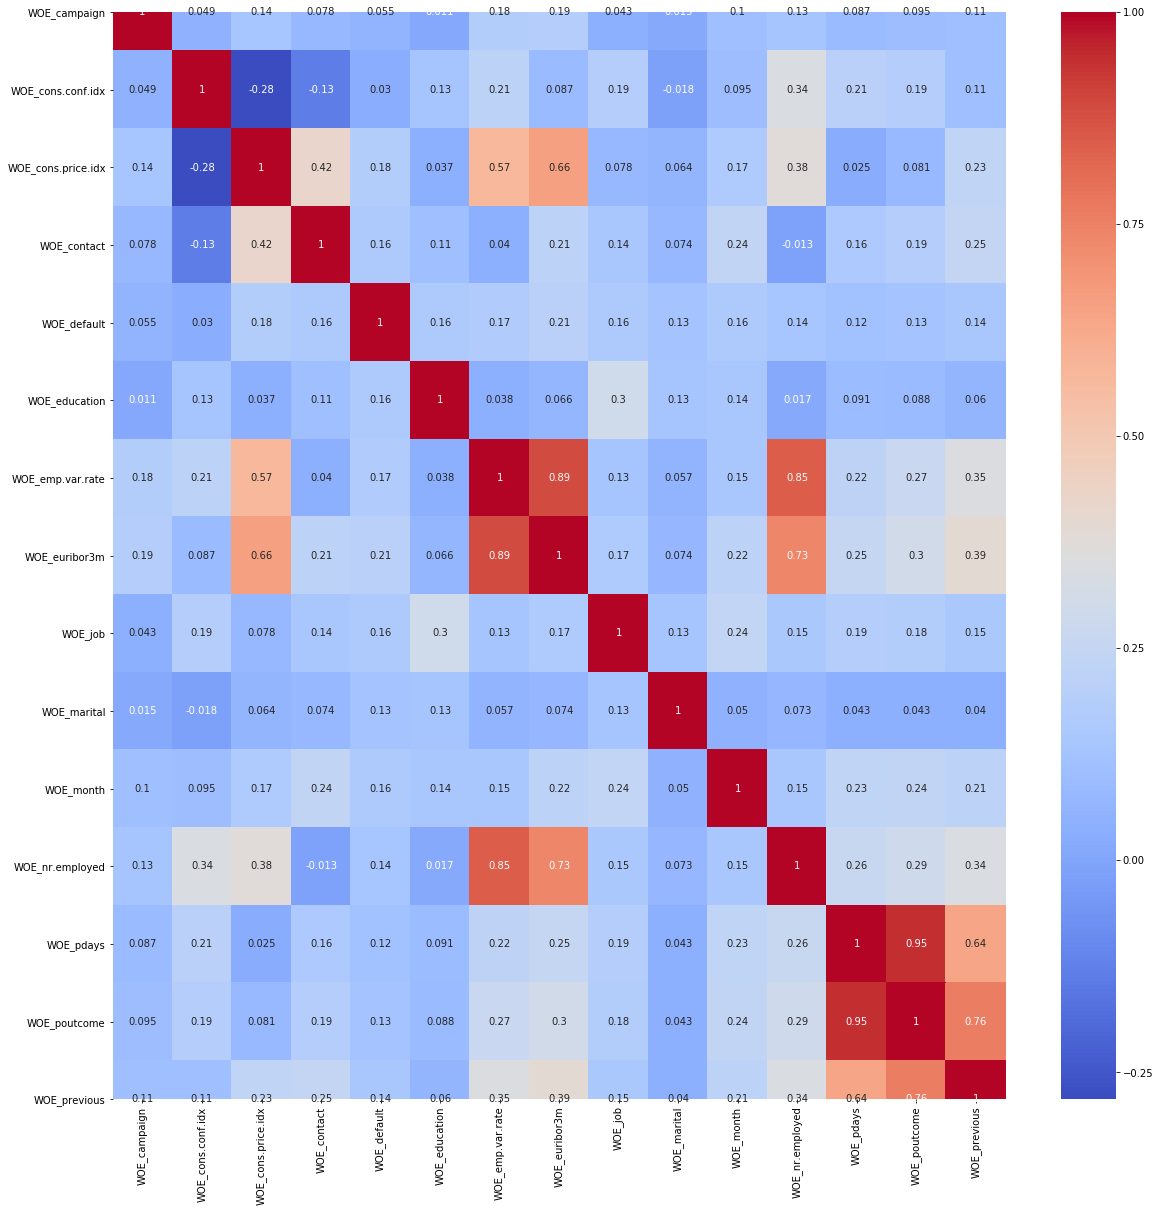

In [45]:
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(),cmap='coolwarm',annot=True)

As mentioned before, for logistic regression I have to exclude the highly correlated predictor, so I will exclude **WOE_euribor3m** and **WOE_emp.var.rate'**

In [74]:
X_log = X.drop(['WOE_euribor3m','WOE_emp.var.rate','WOE_previous','WOE_pdays'],axis=1)
y_log = y

In [75]:
from sklearn.model_selection import train_test_split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.3,random_state=101)

Importing LogisticRegression, fit it to the train data, and predict for the train and dataset

In [76]:
from sklearn.linear_model import LogisticRegression
LogModel = LogisticRegression()
LogModel.fit(X_train_log,y_train_log)
log_prediction_train = LogModel.predict(X_train_log)
log_prediction_test = LogModel.predict(X_test_log)

### 4.2 Decision Tree Model

Splitting the data to train and test data set

In [49]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.5,random_state=101)

Importing DecisionTreeClassifier() to develop model based on decision tree algorithm and use it to predict. I will **prune** to prevent the model to overfit the training data

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_leaf_nodes=10)
dt_model.fit(X_train_dt,y_train_dt)

dt_prediction_train = dt_model.predict(X_train_dt)
dt_prediction_test = dt_model.predict(X_test_dt)

### 4.3 Random Forest Model

Splitting the data to train and test data set

In [51]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3,random_state=101)

Compiling model using Random Forest Algorithm.

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=600,max_leaf_nodes=50)
rf_model.fit(X_train_rf,y_train_rf)

RandomForestClassifier(max_leaf_nodes=50, n_estimators=600)

The model used to predict train dataset and test dataset

In [53]:
rf_prediction_train = rf_model.predict(X_train_rf)
rf_prediction_test = rf_model.predict(X_test_rf)

### 4.4 Support Vector Machine Model

Splitting the data to train data and test data

In [54]:
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X.values, y.values, test_size=0.3, random_state=101)

The data should be scaled first

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_svc)

StandardScaler()

In [56]:
X_train_svc = scaler.transform(X_train_svc)
X_test_svc = scaler.transform(X_test_svc)

Then model compiled with best C and gamma that I find using grid search

In [57]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001]} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train_svc,y_train_svc)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total=  14.6s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.5s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=  14.3s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  14.2s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  14.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  14.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  12.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  12.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  12.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ................................ C=10, gamma=0.001, total=  13.1s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  36.9s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  38.6s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  32.6s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  35.8s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  33.2s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total= 1.5min
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 34.8min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

After compiled, the model used to predict the train and test data set  

In [58]:
svc_prediction_train = grid.predict(X_train_svc)
svc_prediction_test = grid.predict(X_test_svc)

### 4.5 TensorFlow Keras Neural Network Model

Splitting the data to train data and test data

In [59]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X.values, y.values, test_size=0.3, random_state=101)

Before using the data, data must be scaled first

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_tf)

StandardScaler()

In [61]:
X_train_tf = scaler.transform(X_train_tf)
X_test_tf = scaler.transform(X_test_tf)

Importing tensorflow, sequential, dense, and dropout

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

Now I'm going to build the model. Because it is binary classification, the last layer should be 1 node only and the last activation function should be sigmoid so the output will be between 0 and 1.

In [63]:
model_tf = Sequential()

model_tf.add(Dense(units = 15,activation='sigmoid'))
model_tf.add(Dense(units = 4,activation='sigmoid'))
model_tf.add(Dense(units = 1,activation = 'sigmoid'))

model_tf.compile(loss='binary_crossentropy',optimizer='adam')

After compiling model, I'm going to use callbacks for early stopping before the model get overfitting

In [64]:
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

Model has been compiled and ready to trained.

In [66]:
model_tf.fit(x=X_train_tf, 
             y=y_train_tf, 
             epochs=1000,
             validation_data=(X_test_tf, y_test_tf),verbose=1,
             callbacks=[early_stop])

Train on 18594 samples, validate on 7969 samples
Epoch 1/1000
18594/18594 [==============================] - 5s 271us/sample - loss: 0.6906 - val_loss: 0.6250
Epoch 2/1000
18594/18594 [==============================] - 2s 99us/sample - loss: 0.5802 - val_loss: 0.5468
Epoch 3/1000
18594/18594 [==============================] - 2s 96us/sample - loss: 0.5395 - val_loss: 0.5333
Epoch 4/1000
18594/18594 [==============================] - 2s 117us/sample - loss: 0.5340 - val_loss: 0.5317
Epoch 5/1000
18594/18594 [==============================] - 2s 106us/sample - loss: 0.5327 - val_loss: 0.5303
Epoch 6/1000
18594/18594 [==============================] - 2s 132us/sample - loss: 0.5316 - val_loss: 0.5295
Epoch 7/1000
18594/18594 [==============================] - 2s 112us/sample - loss: 0.5306 - val_loss: 0.5286
Epoch 8/1000
18594/18594 [==============================] - 2s 101us/sample - loss: 0.5296 - val_loss: 0.5280
Epoch 9/1000
18594/18594 [==============================] - 2s 107us/samp

Epoch 75/1000
18594/18594 [==============================] - 2s 84us/sample - loss: 0.5103 - val_loss: 0.5174
Epoch 76/1000
18594/18594 [==============================] - 2s 90us/sample - loss: 0.5103 - val_loss: 0.5171
Epoch 77/1000
18594/18594 [==============================] - 1s 80us/sample - loss: 0.5102 - val_loss: 0.5173
Epoch 78/1000
18594/18594 [==============================] - 2s 115us/sample - loss: 0.5100 - val_loss: 0.5173
Epoch 79/1000
18594/18594 [==============================] - 2s 107us/sample - loss: 0.5100 - val_loss: 0.5170
Epoch 80/1000
18594/18594 [==============================] - 2s 123us/sample - loss: 0.5098 - val_loss: 0.5175
Epoch 81/1000
18594/18594 [==============================] - 2s 97us/sample - loss: 0.5099 - val_loss: 0.5173
Epoch 82/1000
18594/18594 [==============================] - 2s 89us/sample - loss: 0.5096 - val_loss: 0.5171
Epoch 83/1000
18594/18594 [==============================] - 2s 91us/sample - loss: 0.5096 - val_loss: 0.5172
Epoch 8

18594/18594 [==============================] - 6s 300us/sample - loss: 0.5058 - val_loss: 0.5154
Epoch 149/1000
18594/18594 [==============================] - 6s 296us/sample - loss: 0.5057 - val_loss: 0.5156
Epoch 150/1000
18594/18594 [==============================] - 5s 250us/sample - loss: 0.5059 - val_loss: 0.5154
Epoch 151/1000
18594/18594 [==============================] - 4s 212us/sample - loss: 0.5057 - val_loss: 0.5154
Epoch 152/1000
18594/18594 [==============================] - 5s 281us/sample - loss: 0.5056 - val_loss: 0.5153
Epoch 153/1000
18594/18594 [==============================] - 5s 251us/sample - loss: 0.5056 - val_loss: 0.5156
Epoch 154/1000
18594/18594 [==============================] - 4s 203us/sample - loss: 0.5056 - val_loss: 0.5160
Epoch 155/1000
18594/18594 [==============================] - 4s 230us/sample - loss: 0.5056 - val_loss: 0.5159
Epoch 156/1000
18594/18594 [==============================] - 7s 379us/sample - loss: 0.5055 - val_loss: 0.5157
Epoch 1

To cross-check either the model overfitting or not, I plot loss on the training data and test data

Text(0.5, 1.0, 'Loss,Val_loss vs Epoch')

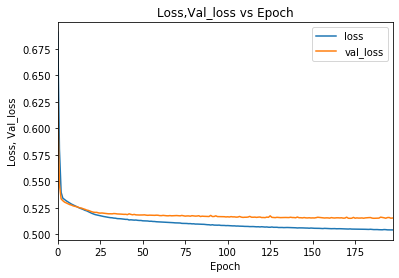

In [67]:
model_loss = pd.DataFrame(model_tf.history.history)
model_loss.plot()
plt.xlabel('Epoch')
plt.ylabel('Loss, Val_loss')
plt.title('Loss,Val_loss vs Epoch')

Because the model seems work well enough where the val_loss flatten and it means it does not overfit the training data, we could use it to predict the traoin and test data set

In [68]:
tf_prediction_test = model_tf.predict_classes(X_test_tf)
tf_prediction_train = model_tf.predict_classes(X_train_tf)

## 5. Evaluating Model

After predict X_test using several algorithm, I will check model's performance using **classification report** and **confusion matrix**. I will also check if the model stability and if it is overfitting or not by plotting the prediction of train data compared by test data

### 5.1 Logistic Regression Model

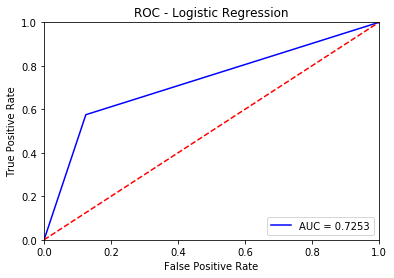

Gini = 45.0535


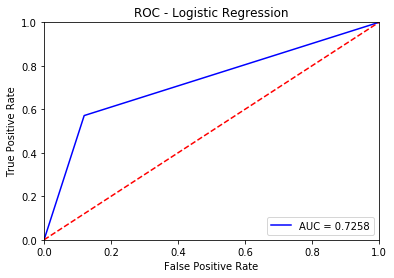

Gini = 45.1587


In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

log_roc_auc_train = roc_auc_score(y_train_log,log_prediction_train)

fpr, tpr, thresholds = roc_curve(y_train_log,log_prediction_train)


plt.figure()
plt.plot(fpr, tpr,'b', label='AUC = %0.4f' % log_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Logistic Regression')
plt.legend(loc="lower right")
plt.show() 


gini = 2*100*(log_roc_auc_train-0.5)
print('Gini = %0.4f'% gini)



log_roc_auc_test = roc_auc_score(y_test_log,log_prediction_test)

fpr, tpr, thresholds = roc_curve(y_test_log,log_prediction_test)


plt.figure()
plt.plot(fpr, tpr,'b', label='AUC = %0.4f' % log_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Logistic Regression')
plt.legend(loc="lower right")
plt.show() 


gini = 2*100*(log_roc_auc_test-0.5)
print('Gini = %0.4f'% gini)

The gini is around 45, AUC is 0.725 and the model seems pretty stable

### 5.2 Decision Tree Model

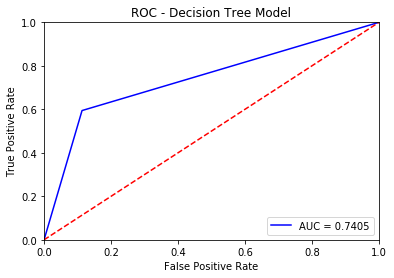

Gini = 48.1046


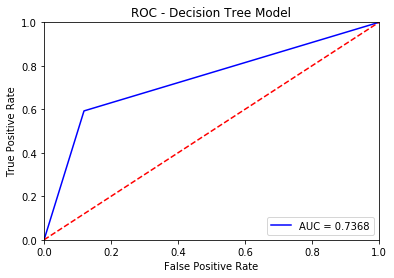

Gini = 47.3519


In [70]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

dt_roc_auc_train = roc_auc_score(y_train_dt,dt_prediction_train)

fpr, tpr, thresholds = roc_curve(y_train_dt,dt_prediction_train)

plt.figure()
plt.plot(fpr, tpr,'b', label='AUC = %0.4f' % dt_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Decision Tree Model')
plt.legend(loc="lower right")
plt.show() 

gini = 2*100*(dt_roc_auc_train-0.5)
print('Gini = %0.4f'% gini)


dt_roc_auc_test = roc_auc_score(y_test_dt,dt_prediction_test)

fpr, tpr, thresholds = roc_curve(y_test_dt,dt_prediction_test)

plt.figure()
plt.plot(fpr, tpr,'b', label='AUC = %0.4f' % dt_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Decision Tree Model')
plt.legend(loc="lower right")
plt.show() 


gini = 2*100*(dt_roc_auc_test-0.5)
print('Gini = %0.4f'% gini)

The gini is around 47, AUC is 0.735 and the model seems pretty stable

### 5.3 Random Forest Model

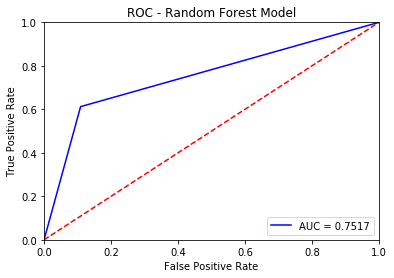

Gini = 50.3367


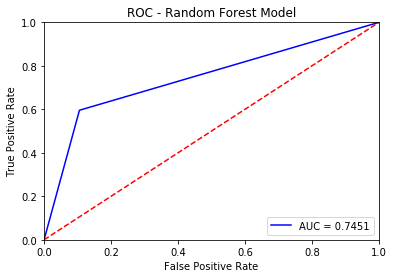

Gini = 49.0156


In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

rf_roc_auc_train = roc_auc_score(y_true=y_train_rf,y_score=rf_prediction_train)

fpr, tpr, thresholds = roc_curve(y_train_rf,rf_prediction_train)

plt.figure()
plt.plot(fpr, tpr,'b', label='AUC = %0.4f' % rf_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Random Forest Model')
plt.legend(loc="lower right")
plt.show() 

gini = 2*100*(rf_roc_auc_train-0.5)
print('Gini = %0.4f'% gini)


rf_roc_auc_test = roc_auc_score(y_true=y_test_rf,y_score=rf_prediction_test)

fpr, tpr, thresholds = roc_curve(y_test_rf,rf_prediction_test)

plt.figure()
plt.plot(fpr, tpr,'b', label='AUC = %0.4f' % rf_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Random Forest Model')
plt.legend(loc="lower right")
plt.show() 

gini = 2*100*(rf_roc_auc_test-0.5)
print('Gini = %0.4f'% gini)

The gini is around 48, AUC is 0.74 and the model seems pretty stable

### 5.4 Support Vector Machine Model

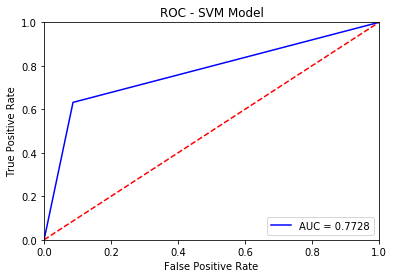

Gini = 54.5558


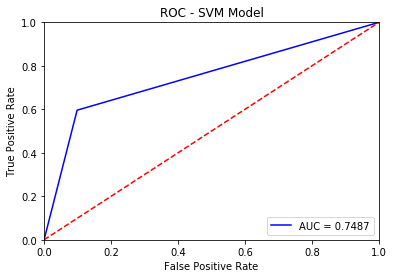

Gini = 49.7437


In [78]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

svc_roc_auc_train = roc_auc_score(y_true=y_train_svc,y_score=svc_prediction_train)

fpr, tpr, thresholds = roc_curve(y_train_svc,svc_prediction_train)

plt.figure()
plt.plot(fpr, tpr,'b', label='AUC = %0.4f' % svc_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - SVM Model')
plt.legend(loc="lower right")
plt.show() 

gini = 2*100*(svc_roc_auc_train-0.5)
print('Gini = %0.4f'% gini)


svc_roc_auc_test = roc_auc_score(y_test_svc,svc_prediction_test)

fpr, tpr, thresholds = roc_curve(y_test_svc,svc_prediction_test)

plt.figure()
plt.plot(fpr, tpr,'b', label='AUC = %0.4f' % svc_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - SVM Model')
plt.legend(loc="lower right")
plt.show() 


gini = 2*100*(svc_roc_auc_test-0.5)
print('Gini = %0.4f'% gini)

The gini is around 49, AUC is 0.75 and the model seems pretty stable

### 5.5 TensorFlow Keras Neural Network Model

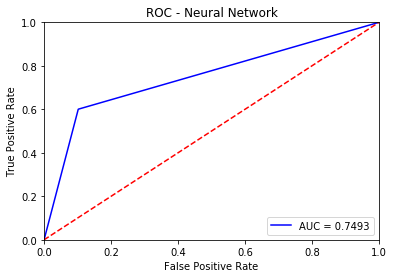

Gini = 49.8530


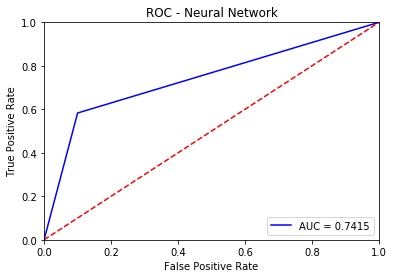

Gini = 48.2979


In [73]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
tf_roc_auc_train = roc_auc_score(y_train_tf,tf_prediction_train)

fpr, tpr, thresholds = roc_curve(y_train_tf,tf_prediction_train)


plt.figure()
plt.plot(fpr, tpr,'b', label='AUC = %0.4f' % tf_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Neural Network')
plt.legend(loc="lower right")
plt.show() 


gini = 2*100*(tf_roc_auc_train-0.5)
print('Gini = %0.4f'% gini)


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
tf_roc_auc_test = roc_auc_score(y_test_tf,tf_prediction_test)

fpr, tpr, thresholds = roc_curve(y_test_tf,tf_prediction_test)


plt.figure()
plt.plot(fpr, tpr,'b', label='AUC = %0.4f' % tf_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Neural Network')
plt.legend(loc="lower right")
plt.show() 


gini = 2*100*(tf_roc_auc_test-0.5)
print('Gini = %0.4f'% gini)

The gini is around 48, AUC is 0.74 and the model seems pretty stable

## 6. Conclusion 

So before I am going to the conclusion, I will give a summary what I have done:
<br>
<br>
1. Explore the data and look how well every binning/grouping in categorical predictor to "predict" whether a customer subscribe a term-deposit or not. Also eliminate the data that is in business point of view "doesn't make sense".
2. Calculate Weight of Evidence for every group and Information Value for each predictor to eliminate some unpredictive feature(age,day_of_week,housing, and loan) and unrealistic feature (duration).
3. Using the WoE values as a substitute for every feature.
4. Balancing the data to upgrade the model performance using SMOTE method to oversample minorty and another undersampling function to undersample majority
5. Used the balanced data as final data to  build the model
6. Evaluate every model stability and its performance in predicting test data using ROC curve.
<br>
<br>
My conclusion is realistic model with around 45-48 gini is pretty good (will give far higher gini if I use **'duration'**). And what makes my models predict much better this time (compared to my previous ones) is the feature engineering I did to reduce unpredictive feature and to balance the dataset 

# References

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
<br>
https://machinelearningmastery.com/k-fold-cross-validation/
<br>
https://en.wikipedia.org/wiki/Consumer_confidence_index
<br>
https://en.wikipedia.org/wiki/Euribor
<br>